In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [124]:
import warnings
import matplotlib.pyplot as plt
# from fbprophet import Prophet
warnings.simplefilter('ignore')
%config Completer.use_jedi = False
import pandas as pd


In [125]:
data = pd.read_csv("india_eatchquake_2000.csv")
#dropping columns with missing values
missing_values_columns = [col for col in data.columns
                     if data[col].isnull().any()]
data = data.drop(missing_values_columns, axis=1)
df = data
data.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
0,2024-02-20T01:05:59.653Z,33.1960,76.8952,10.000,4.3,mb,us,us7000m09y,2024-02-20T01:24:44.040Z,"30 km S of Padam, India",earthquake,reviewed,us,us
1,2024-02-17T18:59:41.994Z,33.9571,92.0058,15.164,4.1,mb,us,us7000lzw3,2024-02-17T22:44:05.040Z,"275 km N of Nagqu, China",earthquake,reviewed,us,us
2,2024-02-17T03:55:23.601Z,22.9482,93.8029,76.002,4.7,mb,us,us7000lzt8,2024-02-17T04:23:43.804Z,"13 km ENE of Falam, Myanmar",earthquake,reviewed,us,us
3,2024-02-11T20:48:49.942Z,21.5206,94.0805,72.436,4.9,mb,us,us7000lyi1,2024-02-16T20:01:52.040Z,"102 km NW of Chauk, Myanmar",earthquake,reviewed,us,us
4,2024-02-11T17:58:16.862Z,15.2552,96.4389,10.000,4.2,mb,us,us7000lzgf,2024-02-16T18:06:43.040Z,"140 km SE of Pyapon, Myanmar",earthquake,reviewed,us,us


In [126]:
df['date'] = pd.to_datetime(df['time']).dt.date

df.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource,date
0,2024-02-20T01:05:59.653Z,33.1960,76.8952,10.000,4.3,mb,us,us7000m09y,2024-02-20T01:24:44.040Z,"30 km S of Padam, India",earthquake,reviewed,us,us,2024-02-20
1,2024-02-17T18:59:41.994Z,33.9571,92.0058,15.164,4.1,mb,us,us7000lzw3,2024-02-17T22:44:05.040Z,"275 km N of Nagqu, China",earthquake,reviewed,us,us,2024-02-17
2,2024-02-17T03:55:23.601Z,22.9482,93.8029,76.002,4.7,mb,us,us7000lzt8,2024-02-17T04:23:43.804Z,"13 km ENE of Falam, Myanmar",earthquake,reviewed,us,us,2024-02-17
3,2024-02-11T20:48:49.942Z,21.5206,94.0805,72.436,4.9,mb,us,us7000lyi1,2024-02-16T20:01:52.040Z,"102 km NW of Chauk, Myanmar",earthquake,reviewed,us,us,2024-02-11
4,2024-02-11T17:58:16.862Z,15.2552,96.4389,10.000,4.2,mb,us,us7000lzgf,2024-02-16T18:06:43.040Z,"140 km SE of Pyapon, Myanmar",earthquake,reviewed,us,us,2024-02-11


In [127]:
df = df[['date','depth','mag']]
df

,date,depth,mag
0,2024-02-20,10.000,4.3
1,2024-02-17,15.164,4.1
2,2024-02-17,76.002,4.7
3,2024-02-11,72.436,4.9
4,2024-02-11,10.000,4.2
...,...,...,...
9815,2000-01-08,35.700,4.7
9816,2000-01-05,33.000,3.9
9817,2000-01-05,33.000,5.5
9818,2000-01-03,33.000,4.6


In [128]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9820 entries, 0 to 9819
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9820 non-null   datetime64[ns]
 1   depth   9820 non-null   float64       
 2   mag     9820 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 230.3 KB


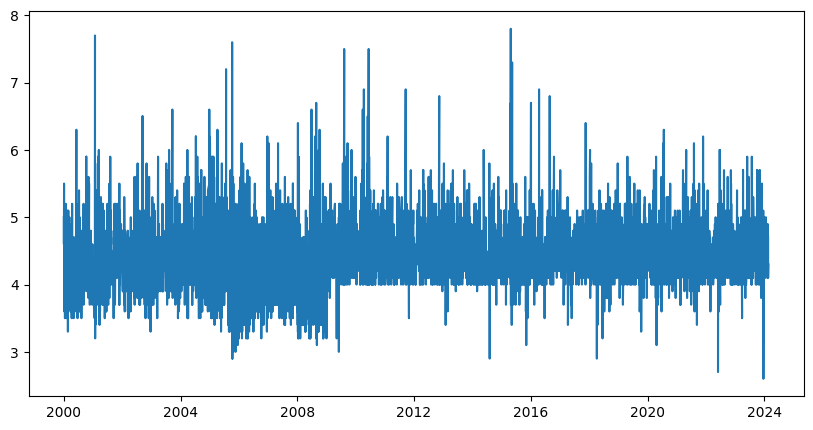

In [129]:
plt.figure(figsize=(10,5))
plt.plot(df.date,df.mag)
plt.show()

In [130]:
model_df = df[['date','mag']]
model_df.columns = ['ds','y']
model_df

,ds,y
0,2024-02-20,4.3
1,2024-02-17,4.1
2,2024-02-17,4.7
3,2024-02-11,4.9
4,2024-02-11,4.2
...,...,...
9815,2000-01-08,4.7
9816,2000-01-05,3.9
9817,2000-01-05,5.5
9818,2000-01-03,4.6


In [131]:
train_df = model_df[model_df['ds'] < '2020-01-01']
test_df = model_df[model_df['ds'] >= '2020-01-01']

# train_df.shape, test_df.shape
train_df


,ds,y
1330,2019-12-25,4.6
1331,2019-12-22,3.8
1332,2019-12-19,4.5
1333,2019-12-19,4.9
1334,2019-12-18,4.5
...,...,...
9815,2000-01-08,4.7
9816,2000-01-05,3.9
9817,2000-01-05,5.5
9818,2000-01-03,4.6


In [132]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have train_df DataFrame

# Ensure np.float is properly assigned
np.float = float

# Convert 'ds' column to datetime
train_df['ds'] = pd.to_datetime(train_df['ds'])

# Set 'ds' as index
train_df.set_index('ds', inplace=True)

# Convert 'y' column to float
train_df['y'] = train_df['y'].astype(float)
print(train_df)

# Fit ARIMA model
# Example: ARIMA(p, d, q) - p: AR order, d: differencing, q: MA order
# You need to choose appropriate values for p, d, and q based on your data
# For example, you can use auto_arima from pmdarima to automatically select these values
model = ARIMA(train_df['y'], order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Make predictions
# Example: Forecast future 10 steps
forecast = model_fit.forecast(steps=10)  

# Print forecast
print(forecast)


              y
ds             
2019-12-25  4.6
2019-12-22  3.8
2019-12-19  4.5
2019-12-19  4.9
2019-12-18  4.5
...         ...
2000-01-08  4.7
2000-01-05  3.9
2000-01-05  5.5
2000-01-03  4.6
2000-01-02  5.0

[8490 rows x 1 columns]
8490    4.562401
8491    4.719914
8492    4.695817
8493    4.842492
8494    4.739145
8495    4.763855
8496    4.721817
8497    4.746781
8498    4.749328
8499    4.760508
Name: predicted_mean, dtype: float64


In [133]:
# making predictions
test_df['ds'] = pd.to_datetime(test_df['ds'])
test_df.set_index('ds', inplace=True)
test_df['y'] = test_df['y'].astype(float)
test_df

# Forecast future 10 steps
forecast = model_fit.forecast(steps=10)

# Print forecast
print(forecast)


8490    4.562401
8491    4.719914
8492    4.695817
8493    4.842492
8494    4.739145
8495    4.763855
8496    4.721817
8497    4.746781
8498    4.749328
8499    4.760508
Name: predicted_mean, dtype: float64
